In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('bill_authentication.csv')

In [3]:
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
x=data.drop('Class',axis=1)

In [5]:
x.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [6]:
data.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [19]:
y=data['Class']

In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
x_train.shape

(1097, 4)

In [24]:
y_test.shape

(275,)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
stds=StandardScaler()

In [29]:
x_train=stds.fit_transform(x_train)
x_test=stds.fit_transform(x_test)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn=KNeighborsClassifier(n_neighbors=5)

In [33]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
y_pred=knn.predict(x_test)

In [35]:
after=pd.DataFrame({'Actual':y_test,'predicted':y_pred,'Difference':(y_test-y_pred)})

In [36]:
after

,Actual,predicted,Difference
1023,1,1,0
642,0,0,0
1196,1,1,0
31,0,0,0
253,0,0,0
...,...,...,...
1342,1,1,0
251,0,0,0
1256,1,1,0
966,1,1,0


In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
confusion_matrix(y_test,y_pred)

array([[157,   0],
       [  0, 118]])

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [40]:
from sklearn.metrics import roc_auc_score,roc_curve

In [41]:
area_under_curve=roc_auc_score(y_test,knn.predict(x_test))

In [42]:
area_under_curve

1.0

In [43]:
fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(x_test)[:,1])

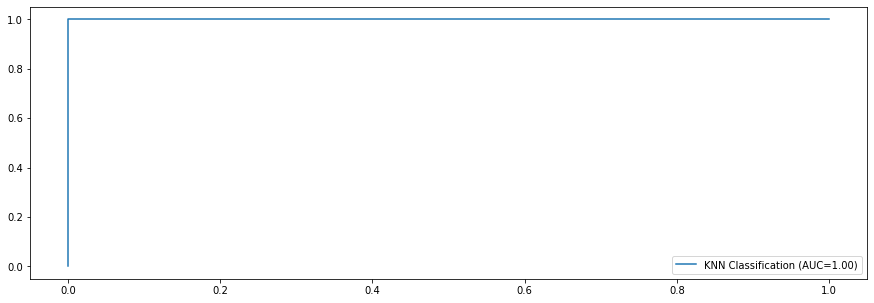

In [44]:
plt.figure(figsize=(15,5))
plt.plot(fpr,tpr,label='KNN Classification (AUC=%0.2f)'%area_under_curve)
plt.legend()

In [45]:
#to find best n_neighbor

In [46]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_i=knn.predict(x_test)
    error_rate.append(np.mean((y_pred_i)!=y_test))

In [47]:
error_rate

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364,
 0.0036363636363636364]

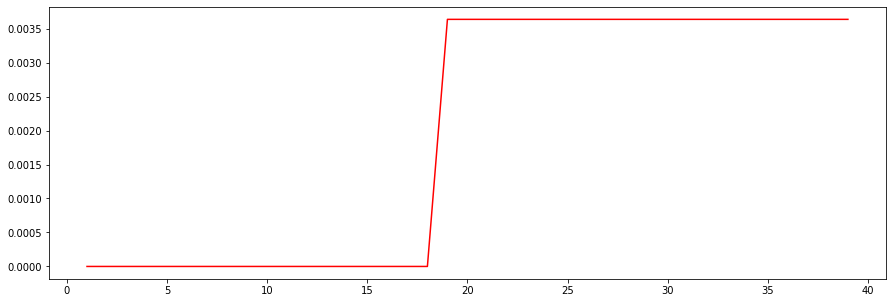

In [49]:
plt.figure(figsize=(15,5))
plt.plot(range(1,40),error_rate,color='red')